In [1]:
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [2]:
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

/Users/hujie/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
reg.intercept_[0], reg.coef_[0][0]

(-14.353783307755521, 6.4735495495770587)

In [7]:
reg.score(ages_test, net_worths_test)

0.81236572923084704

In [ ]:
reg.score(ages_train, net_worths_train)

In [8]:
reg.predict([[27]])[0][0]

160.43205453082507

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.scatter(ages_test, net_worths_test)
plt.plot(ages_test, reg.predict(ages_test), color = "blue", linewidth = 3)

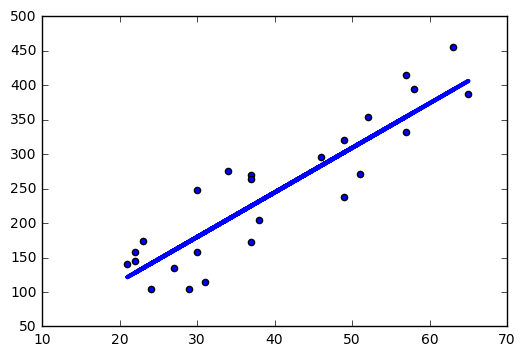

In [15]:
plt.show()